In [ ]:
# importing the modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#showing a sample of the data
df = pd.read_csv('D:\index.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [3]:
# showing the shape of the data
df.shape

(1395, 6)

In [12]:
# filling nan values
df['card']=df['card'].fillna("no card used")

In [4]:
# the diffrent coffee names
coffee=df['coffee_name'].unique()
coffee

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

In [11]:
# adding coffee sizes
sizes=['small','medium','large','x large','jumbo']
df['size'] = ''
for name in coffee:
    coffee_prices_list=list(set(df[df['coffee_name']==name]['money']))
    prices = sorted(coffee_prices_list)
    for price in prices :
            existing_sizes=len(prices)
            for i in range(existing_sizes):
                df.loc[df['money']==prices[i],'size']=sizes[i]
df.head()

,date,datetime,cash_type,card,money,coffee_name,size
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,large
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,large
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,large
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,large
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,large


In [14]:
# changeing the type to datetime
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes

date           datetime64[ns]
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
size                   object
dtype: object

In [15]:
# creating sales pivot table 
pd.pivot_table(df,values=['money'],index=['coffee_name','size'],aggfunc='sum')

money
coffee_name         size            
Americano           large    1531.70
                    medium   3529.56
                    x large   412.00
Americano with Milk jumbo     280.00
                    large    1723.80
                    medium   3434.16
                    small    4824.54
                    x large   238.00
Cappuccino          jumbo     400.00
                    large    1509.30
                    medium   4375.52
                    small    1969.20
                    x large   195.00
Cocoa               jumbo      40.00
                    large     348.30
                    medium    528.08
                    small     623.58
                    x large   117.00
Cortado             large    1156.00
                    medium   2290.82
                    x large   150.00
Espresso            large     336.00
                    medium    483.42
                    small     416.76
                    x large   100.00
Hot Chocolate       jumbo     200.00
                    large    1122.30
                    medium   1056.16
                    small     557.94
                    x large    39.00
Latte               jumbo     640.00
                    large    1973.70
                    medium   4337.80
                    small    3577.38
                    x large   351.00

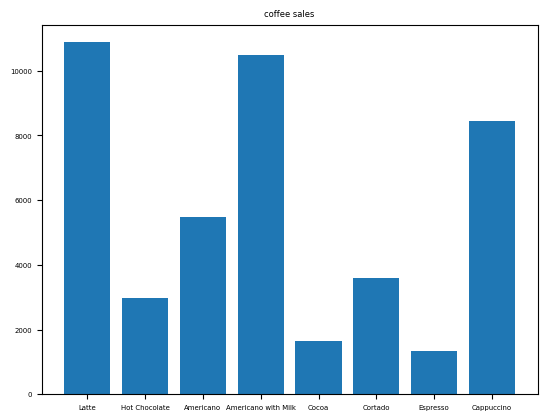

In [16]:
# sales digram
sales=[]
for name in coffee:
    sales.append(df[df['coffee_name']==name]['money'].sum())
plt.rcParams.update({'font.size' : 5})
plt.bar(coffee,sales)
plt.title('coffee sales')
plt.show()

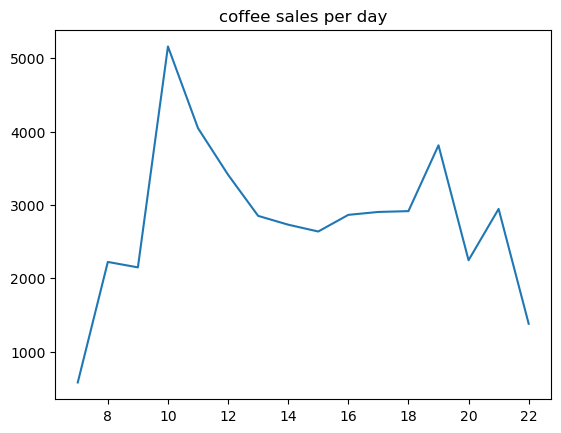

In [17]:
#busiest time of the day
daily_sales=[]
work_hours=sorted(list(df['datetime'].dt.hour.unique()))
for hour in work_hours:
    daily_sales.append(df[df['datetime'].dt.hour==hour]['money'].sum())
plt.rcParams.update({'font.size' : 10})
plt.plot(work_hours,daily_sales)
plt.title('coffee sales per day')
plt.show()

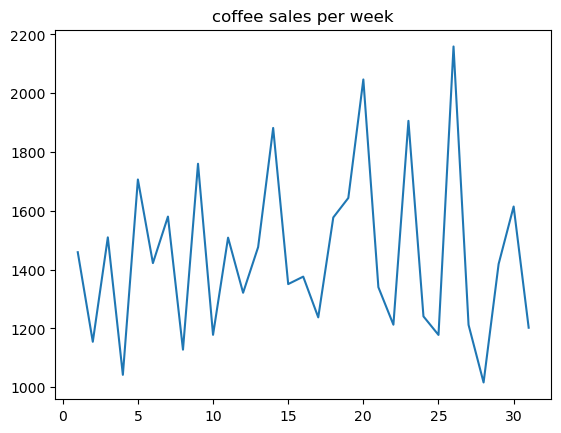

In [18]:
#busiest time of the week
weekly_sales=[]
work_days=sorted(list(df['datetime'].dt.day.unique()))
for day in work_days:
    weekly_sales.append(df[df['datetime'].dt.day==day]['money'].sum())
plt.rcParams.update({'font.size' : 10})
plt.plot(work_days,weekly_sales)
plt.title('coffee sales per week')
plt.show()

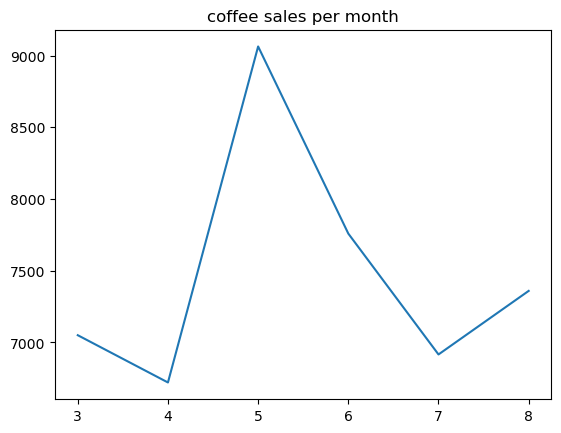

In [19]:
#busiest time of the year
monthly_sales=[]
work_month=sorted(list(df['datetime'].dt.month.unique()))
for month in work_month:
    monthly_sales.append(df[df['datetime'].dt.month==month]['money'].sum())
plt.rcParams.update({'font.size' : 10})
plt.plot(work_month,monthly_sales)
plt.title('coffee sales per month')
plt.show()